<a href="https://colab.research.google.com/github/aashish2000/Emotion-Detection/blob/master/Simple%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install tensorflow==2.0
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
earlystop = EarlyStopping(patience=2)
callbacks = [earlystop, learning_rate_reduction]

batch_size=32
momentum=0.9
epochs=20
epoch_size=400
lr=0.005
wd=0.0005

train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=90)
validation_datagen = ImageDataGenerator(rescale=1/255, rotation_range=90)
test_datagen = ImageDataGenerator(rescale=1./255,rotation_range=90)
nb_train_samples = 28709
nb_validation_samples = 3589

2.0.0


In [2]:
train_generator = train_datagen.flow_from_directory(
        "/content/drive/My Drive/fer_images/Training",  # This is the source directory for training images
        target_size=(48, 48),
        #target_size=(96, 96),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        "/content/drive/My Drive/fer_images/PrivateTest",  # This is the source directory for training images
        target_size=(48, 48), 
        #target_size=(96, 96),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
test_generator = train_datagen.flow_from_directory(
        "/content/drive/My Drive/fer_images/PublicTest",  # This is the source directory for training images
        target_size=(48, 48), 
        #target_size=(96, 96),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
filenames = test_generator.filenames
nb_test_samples = len(filenames)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [0]:
# Simple 4-Layer Model
model= Sequential()

model.add(Conv2D(16, (3,3), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 16)        432       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 32)        4608      
_________________________________________________________________
batch_normalization_6 (Batch (None, 21, 21, 32)       

In [0]:
# 5 - Layer Model Ver 2
model= Sequential()

model.add(Conv2D(16, (3,3), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 16)        432       
_________________________________________________________________
batch_normalization_10 (Batc (None, 46, 46, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 32)        4608      
_________________________________________________________________
batch_normalization_11 (Batc (None, 21, 21, 32)       

In [0]:
# 5 - Layer Model Ver 3
model= Sequential()

model.add(Conv2D(16, (2,2), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 47, 47, 16)        192       
_________________________________________________________________
batch_normalization_15 (Batc (None, 47, 47, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 47, 47, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 32)        2048      
_________________________________________________________________
batch_normalization_16 (Batc (None, 23, 23, 32)       

In [0]:
# 5-Layer Model Ver 4
model= Sequential()

model.add(Conv2D(16, (3,3), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(512, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        432       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 32)        1

In [0]:
# 6-Layer Model
model= Sequential()

model.add(Conv2D(16, (3,3), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(512, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (1,1), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(2048,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 16)        432       
_________________________________________________________________
batch_normalization_5 (Batch (None, 46, 46, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 46, 46, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 32)        4608      
_________________________________________________________________
batch_normalization_6 (Batch (None, 21, 21, 32)       

In [0]:
# 5-Layer Model Ver 5
model= Sequential()

model.add(Conv2D(16, (2,2), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

#model.add(Dense(2048,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 16)        192       
_________________________________________________________________
batch_normalization (BatchNo (None, 47, 47, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 47, 47, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        4096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 64)        2

In [0]:
# 6-Layer Model Ver 3
model= Sequential()

model.add(Conv2D(16, (2,2), input_shape=(48, 48, 3),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2),use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (1,1), use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))


model.add(Flatten())

#model.add(Dense(2048,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 47, 47, 16)        192       
_________________________________________________________________
batch_normalization_17 (Batc (None, 47, 47, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 47, 47, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 64)        4096      
_________________________________________________________________
batch_normalization_18 (Batc (None, 23, 23, 64)       

In [0]:
# Inception Model
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(96,96,3))

for layer in base_model.layers[:]:
    layer.trainable = True

'''for layer in base_model.layers:
    print(layer, layer.trainable)'''

model=Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 7175      
Total params: 23,908,135
Trainable params: 23,873,703
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=nb_train_samples // batch_size,
      validation_data=validation_generator, 
      validation_steps=nb_validation_samples // batch_size,
      epochs=epochs,
      callbacks=callbacks)

score = model.evaluate_generator(validation_generator,nb_validation_samples//batch_size)

print(" Total Validation Accuracy: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

model.save("/content/drive/My Drive/emotion-models/6layer_mode3.h5")

Epoch 1/20
897/897 [==============================] - 14217s 16s/step - loss: 1.8800 - accuracy: 0.2208 - val_loss: 1.8219 - val_accuracy: 0.2453
Epoch 2/20
897/897 [==============================] - 247s 275ms/step - loss: 1.7937 - accuracy: 0.2479 - val_loss: 1.8170 - val_accuracy: 0.2506
Epoch 3/20
897/897 [==============================] - 248s 276ms/step - loss: 1.7645 - accuracy: 0.2662 - val_loss: 1.7913 - val_accuracy: 0.2539
Epoch 4/20
897/897 [==============================] - 248s 277ms/step - loss: 1.7503 - accuracy: 0.2740 - val_loss: 1.8143 - val_accuracy: 0.2520
Epoch 5/20
897/897 [==============================] - 246s 275ms/step - loss: 1.7379 - accuracy: 0.2842 - val_loss: 1.7541 - val_accuracy: 0.2706
Epoch 6/20
897/897 [==============================] - 249s 277ms/step - loss: 1.7265 - accuracy: 0.2953 - val_loss: 1.7215 - val_accuracy: 0.2799
Epoch 7/20
897/897 [==============================] - 249s 277ms/step - loss: 1.7108 - accuracy: 0.3010 - val_loss: 1.7395 -

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.models import load_model
from __future__ import division
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

json_file = open('/content/drive/My Drive/emotion-models/fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/emotion-models/fer.h5")
#model=load_model("/content/drive/My Drive/emotion-models/5layer_model5.h5")
#model.summary()

score = loaded_model.evaluate_generator(validation_generator,nb_validation_samples//batch_size)
print(" Total: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])


RuntimeError: ignored

In [0]:
from tensorflow.keras.models import load_model

model=load_model("/content/drive/My Drive/emotion-models/5layer_model5.h5")
model.summary()

score = model.evaluate_generator(validation_generator,nb_validation_samples//batch_size)
print(" Total: ", len(validation_generator.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


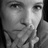

00029105.jpg
[[9.9895132e-01 0.0000000e+00 1.0486852e-03 2.7979513e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Predicted: Angry


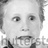

00029106.jpg
[[1.3752227e-36 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.4861957e-35]]
Predicted: Fear


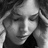

00029152.jpg
[[6.8771428e-08 0.0000000e+00 1.2265653e-26 9.9999988e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Predicted: Happy


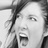

00029157.jpg
[[8.8090575e-09 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
Predicted: Fear


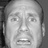

00029113.jpg
[[9.843565e-18 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00]]
Predicted: Fear


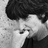

00029154.jpg
[[2.8489091e-11 0.0000000e+00 1.7753738e-11 6.0489158e-26 1.0000000e+00
  1.6173182e-09 2.3424350e-33]]
Predicted: Neutral


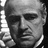

00029107.jpg
[[1. 0. 0. 0. 0. 0. 0.]]
Predicted: Angry


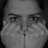

00029126.jpg
[[2.8440969e-05 0.0000000e+00 9.9997151e-01 1.4269573e-20 0.0000000e+00
  1.8988209e-31 6.5329608e-29]]
Predicted: Fear


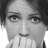

00029146.jpg
[[0. 0. 1. 0. 0. 0. 0.]]
Predicted: Fear


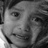

00029165.jpg
[[1.8704251e-18 0.0000000e+00 1.0000000e+00 3.7311320e-37 0.0000000e+00
  0.0000000e+00 7.1139291e-31]]
Predicted: Fear


In [0]:
from IPython.display import Image, display
from keras.preprocessing.image import img_to_array, load_img
'''from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import backend as K'''
import matplotlib.pyplot as plt
import numpy as np
import os


path="/content/drive/My Drive/fer_images/PublicTest/Fear/"

i=0

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]
arr=get_immediate_subdirectories("/content/drive/My Drive/fer_images/PublicTest/")
arr.sort()
print(arr)
listdir=os.listdir(path)
for entry in listdir[50:100]:
    if os.path.isfile(os.path.join(path, entry)):
        display(Image(os.path.join(path, entry)))
        print(entry)
        image = load_img(path+entry, target_size=(48, 48))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        #image = preprocess_input(image)
        #Generate predictions
        image = np.vstack([image])
        pred = model.predict(image)
        print(pred)
        #print(len(pred[0]))
        #print(np.argmax(pred[0]))
        print('Predicted:', arr[np.argmax(pred[0])])
        
        i+=1
    if(i==10):
        break